In [1]:
ticker = "MANCHIN-24NOV06"

In [2]:
from pathlib import Path
import os
def load_env_vars_from_file(path: Path):
    file = path.read_text()
    for line in file.splitlines():
        if line.startswith("export"):
            var_to_value = line.split(" ")[1].split("=")
            var_ = var_to_value[0]
            value_ = var_to_value[1][1:-1]
            os.environ[var_] = value_
def set_up_prod_credentials():
    file = "../../../../scripts/prod_setup_creds.sh"
    load_env_vars_from_file(Path(file))
set_up_prod_credentials()

In [22]:
from exchange.interface import ExchangeInterface
from datetime import datetime


start = datetime(2024, 5, 30)
end = datetime(2024, 6, 2)
e = ExchangeInterface(is_test_run=False)
mh = e.get_market_history(ticker, start, end)

In [23]:
no_ask = [x.no_ask for x in mh]
yes_ask = [x.yes_ask for x in mh]
ts = [x.ts for x in mh]

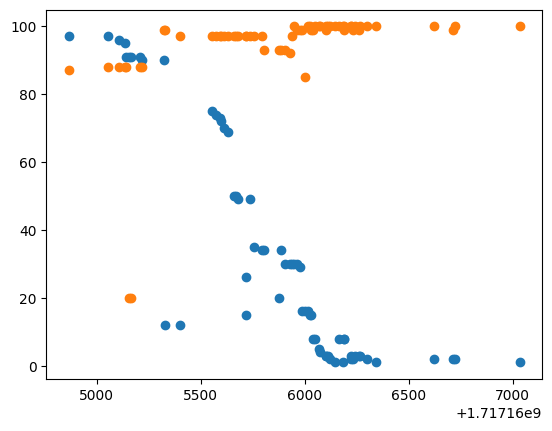

In [24]:
import matplotlib.pyplot as plt

skip_first = 2
skip_last = 50
plt.scatter(ts[skip_first:-1*skip_last], no_ask[skip_first:-1*skip_last])
plt.scatter(ts[skip_first:-1*skip_last], yes_ask[skip_first:-1*skip_last])

In [26]:
start = datetime(2024, 5, 30)
end = datetime(2024, 6, 2)
e = ExchangeInterface(is_test_run=False)
trades = list(e.get_trades(ticker, start, end))

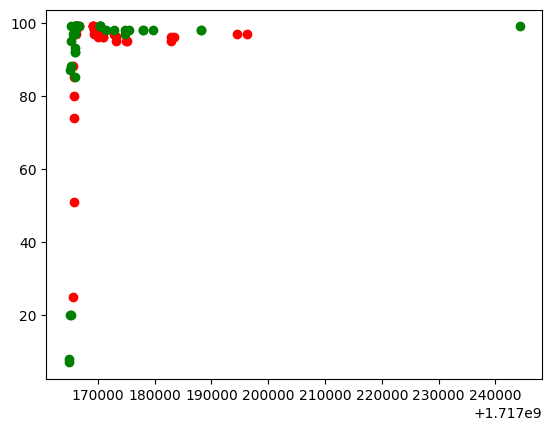

In [45]:
from helpers.types.orders import Side


yes_price_no_taker = [x.yes_price for x in trades if x.taker_side == Side.NO]
ts_no_taker = [x.created_time.timestamp() for x in trades if x.taker_side == Side.NO]

yes_price_yes_taker = [x.yes_price for x in trades if x.taker_side == Side.YES]
ts_yes_taker = [x.created_time.timestamp() for x in trades if x.taker_side == Side.YES]

skip_first = 1
skip_last = 1

plt.scatter(ts_no_taker[skip_first:-1*skip_last], yes_price_no_taker[skip_first:-1*skip_last], c='red')
plt.scatter(ts_yes_taker[skip_first:-1*skip_last], yes_price_yes_taker[skip_first:-1*skip_last], c='green')

In [ ]:
from strategy.utils import ColeDBInterface


db = ColeDBInterface()